# 0. Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# 1. Read Dataset

In [2]:
dataset = pd.read_csv("../data/erha_sales_case_study.csv")

# 2. Analysis Data

## 2.1. Analysis #1: Getting to know the data

In [3]:
'''
As a new data, we should know how's the data looks like. 
This is done by simple invoking the variable corresponding to it.
'''
dataset

,TransactionDate,ChannelCode,ChannelStoreName,City,CustomerID,Gender,Age,TglReg,ProductCode,ProductName,TotalSales,PaymentMethodType,PaymentMethodName,DoctorID,DoctorName,MedicalJobdesk,Month
0,2023-01-01,CH004,Erha Clinic Surabaya,Surabaya,CUST2982,M,27,2021-10-06,TRT002,Laser Rejuvenation,1500000,Cash,Cash,DR001,dr. Amanda Sp.KK,Doctor,2023-01
1,2023-01-01,CH001,Erha Derma Center Kemanggisan,Jakarta Barat,CUST1833,F,36,2021-05-25,TRT003,Hair Growth Therapy,1500000,Cashless,Admedika,DR002,dr. Budi Santoso,Doctor,2023-01
2,2023-01-01,CH001,Erha Derma Center Kemanggisan,Jakarta Barat,CUST1424,F,43,2021-03-10,TRT003,Hair Growth Therapy,750000,Cashless,Cash,DR001,dr. Amanda Sp.KK,Doctor,2023-01
3,2023-01-01,CH001,Erha Derma Center Kemanggisan,Jakarta Barat,CUST2103,F,24,2023-01-01,PRD002,Brightening Night Cream,185000,Cashless,Credit Card BCA,DR002,dr. Budi Santoso,Doctor,2023-01
4,2023-01-01,CH003,Erha Clinic Bandung,Bandung,CUST1263,F,32,2023-01-01,PRD002,Brightening Night Cream,185000,Cashless,Cash,DR001,dr. Amanda Sp.KK,Doctor,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,2023-12-31,CH002,Erha Apothecary PIK,Jakarta Utara,CUST1884,M,31,2023-02-12,PRD003,Collagen Supplement,300000,Cash,Credit Card BCA,DR001,dr. Amanda Sp.KK,Doctor,2023-12
8577,2023-12-31,CH002,Erha Apothecary PIK,Jakarta Utara,CUST1752,F,42,2023-12-31,PRD003,Collagen Supplement,600000,Cashless,GoPay,DR002,dr. Budi Santoso,Doctor,2023-12
8578,2023-12-31,CH001,Erha Derma Center Kemanggisan,Jakarta Barat,CUST2072,F,43,2022-03-31,PRD002,Brightening Night Cream,185000,Cashless,OVO,DR002,dr. Budi Santoso,Doctor,2023-12
8579,2023-12-31,CH004,Erha Clinic Surabaya,Surabaya,CUST1183,F,28,2023-09-19,PRD002,Brightening Night Cream,185000,Cash,GoPay,DR003,dr. Citra Lestari,Doctor,2023-12


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8581 entries, 0 to 8580
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TransactionDate    8581 non-null   object
 1   ChannelCode        8581 non-null   object
 2   ChannelStoreName   8581 non-null   object
 3   City               8581 non-null   object
 4   CustomerID         8581 non-null   object
 5   Gender             8581 non-null   object
 6   Age                8581 non-null   int64 
 7   TglReg             8581 non-null   object
 8   ProductCode        8581 non-null   object
 9   ProductName        8581 non-null   object
 10  TotalSales         8581 non-null   int64 
 11  PaymentMethodType  8581 non-null   object
 12  PaymentMethodName  8581 non-null   object
 13  DoctorID           8581 non-null   object
 14  DoctorName         8581 non-null   object
 15  MedicalJobdesk     8581 non-null   object
 16  Month              8581 non-null   object


In [5]:
'''
So the problem only data type, we could fix this issues by executing following
lines.
'''
dataset.TransactionDate = pd.to_datetime(dataset.TransactionDate)
dataset.TglReg = pd.to_datetime(dataset.TglReg)

In [6]:
'''
Recheck the result.
'''
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8581 entries, 0 to 8580
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TransactionDate    8581 non-null   datetime64[ns]
 1   ChannelCode        8581 non-null   object        
 2   ChannelStoreName   8581 non-null   object        
 3   City               8581 non-null   object        
 4   CustomerID         8581 non-null   object        
 5   Gender             8581 non-null   object        
 6   Age                8581 non-null   int64         
 7   TglReg             8581 non-null   datetime64[ns]
 8   ProductCode        8581 non-null   object        
 9   ProductName        8581 non-null   object        
 10  TotalSales         8581 non-null   int64         
 11  PaymentMethodType  8581 non-null   object        
 12  PaymentMethodName  8581 non-null   object        
 13  DoctorID           8581 non-null   object        
 14  DoctorNa

## 2.2. Analysis #2: Executive Summary

In [7]:
total_revenue = dataset.TotalSales.sum()
total_transaction = dataset.shape[0]
total_customer = dataset.CustomerID.nunique()
avg_transaction_value = total_revenue / total_transaction
purchase_freq = total_transaction / total_customer

print(f"Total Revenue: Rp{total_revenue:,.2f}")
print(f"Total Transactions: {total_transaction:,}")
print(f"Total Unique Customers: {total_customer:,}")
print(f"Average Transaction Value: Rp{avg_transaction_value:,.2f}")
print(f"Purchase Frequency: {purchase_freq:.2f}")

Total Revenue: Rp5,810,450,000.00
Total Transactions: 8,581
Total Unique Customers: 1,972
Average Transaction Value: Rp677,129.71
Purchase Frequency: 4.35


## 2.3. Analysis #3

Text(0.5, 0, 'Revenue')

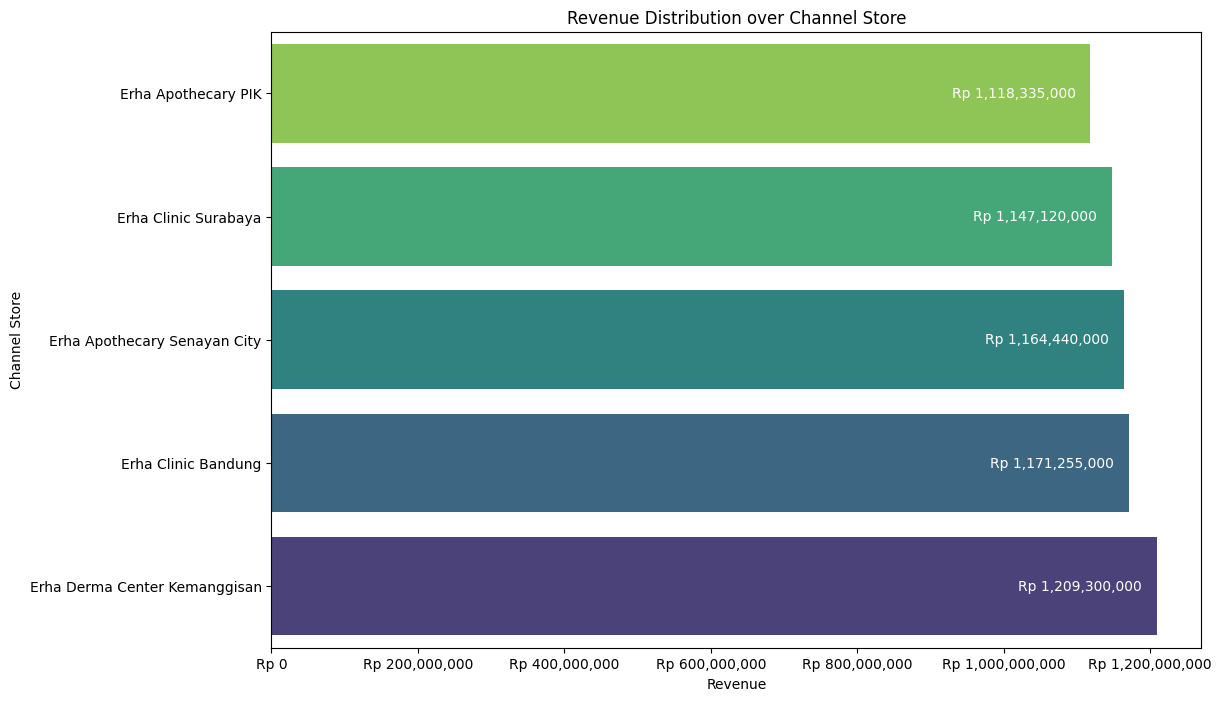

In [8]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=dataset.groupby("ChannelStoreName")["TotalSales"].sum() \
        .sort_values(ascending=True).sort_values().reset_index(),
    x="TotalSales",
    y="ChannelStoreName",
    hue="ChannelStoreName",
    palette="viridis_r",
    errorbar=None,
    orient="h"
)
ax.xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"Rp {x:,.0f}")
)
for container in ax.containers:
    ax.bar_label(
        container,
        fmt=lambda x: f"Rp {x:,.0f}",
        padding=-100,
        color="white"
    )
ax.set_title("Revenue Distribution over Channel Store")
ax.set_ylabel("Channel Store")
ax.set_xlabel("Revenue")


Text(0.5, 0, 'Revenue')

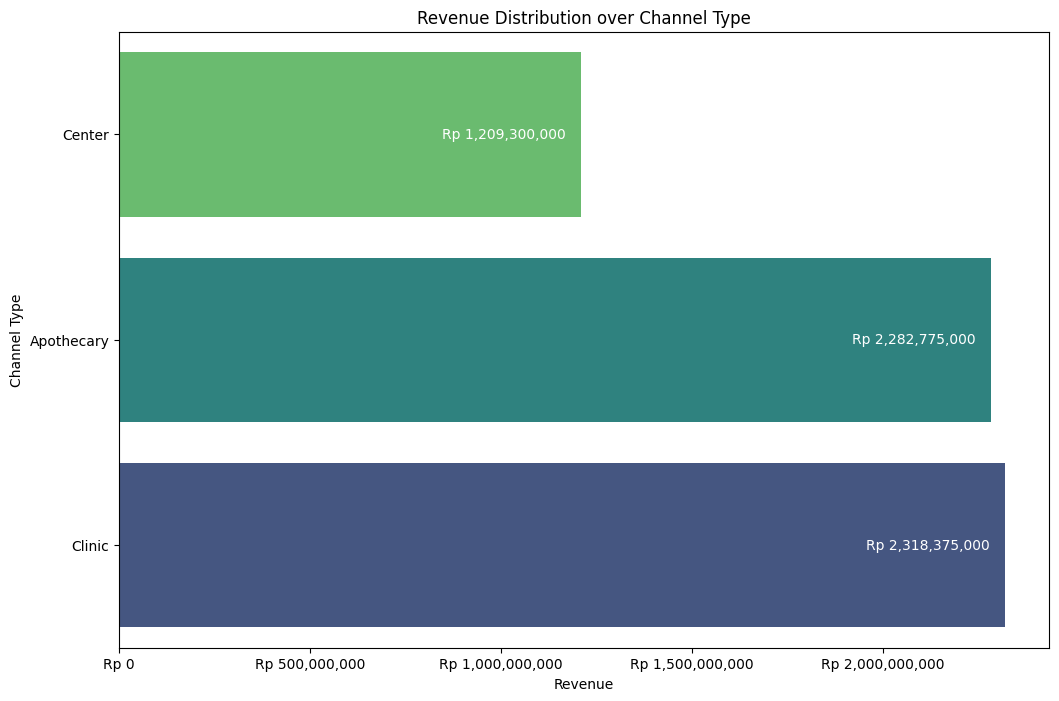

In [9]:
data = dataset.copy()
data["ChannelType"] = data["ChannelStoreName"].apply(
    lambda x: "Apothecary" if "apothecary" in x.lower() 
    else ("Clinic" if "clinic" in x.lower() 
    else ("Center" if "center" in x.lower() 
    else "Other"))
)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=data.groupby("ChannelType")["TotalSales"].sum() \
        .sort_values(ascending=True).sort_values().reset_index(),
    x="TotalSales",
    y="ChannelType",
    hue="ChannelType",
    palette="viridis_r",
    errorbar=None,
    orient="h"
)
ax.xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"Rp {x:,.0f}")
)
for container in ax.containers:
    ax.bar_label(
        container,
        fmt=lambda x: f"Rp {x:,.0f}",
        padding=-100,
        color="white"
    )
ax.set_title("Revenue Distribution over Channel Type")
ax.set_ylabel("Channel Type")
ax.set_xlabel("Revenue")


Text(0.5, 0, 'Revenue')

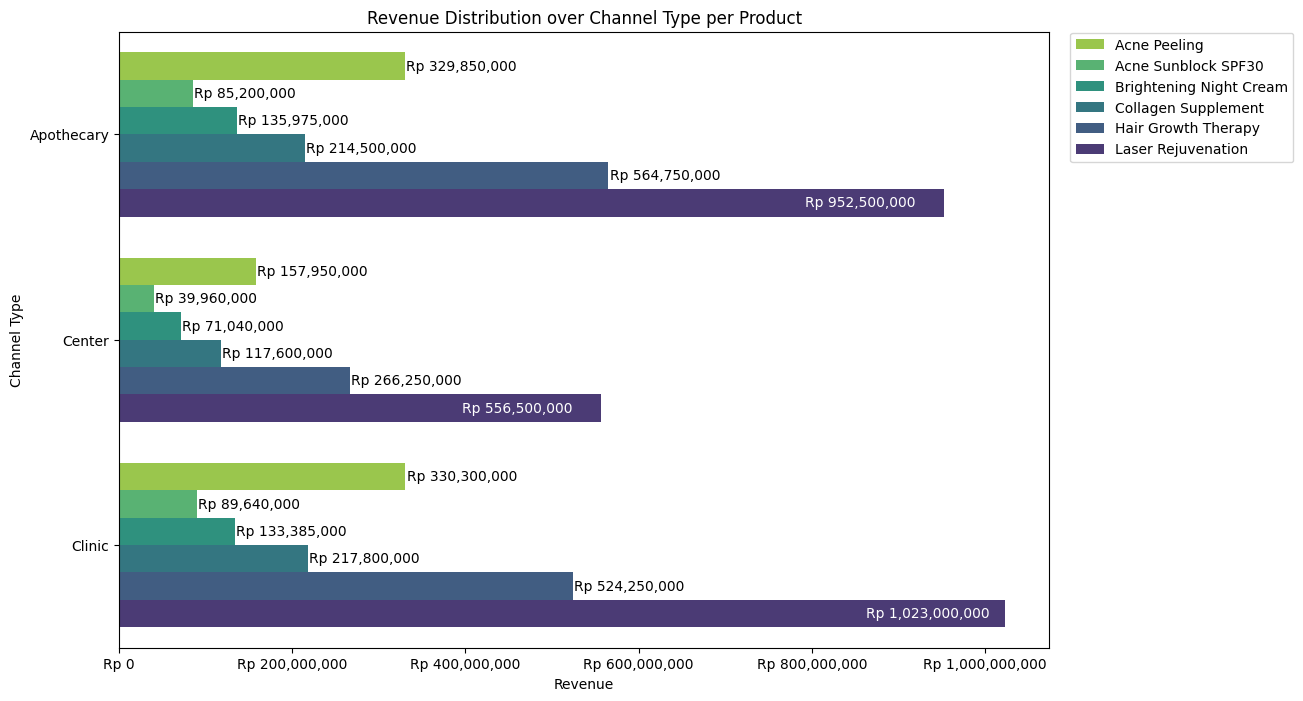

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=data.groupby(["ChannelType", "ProductName"])["TotalSales"].sum() \
        .reset_index(),
    x="TotalSales",
    y="ChannelType",
    hue="ProductName",
    palette="viridis_r",
    errorbar=None,
    orient="h"
)
ax.xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"Rp {x:,.0f}")
)
for i, container in enumerate(ax.containers):
    if (i + 1) % 6 != 0:
        ax.bar_label(
            container,
            fmt=lambda x: f"Rp {x:,.0f}",
            padding=1
        )
    else:
        ax.bar_label(
            container,
            fmt=lambda x: f"Rp {x:,.0f}",
            padding=-100,
            color="white"
        )
ax.legend(bbox_to_anchor=(1.27, 1.01), loc="upper right")
ax.set_title("Revenue Distribution over Channel Type per Product")
ax.set_ylabel("Channel Type")
ax.set_xlabel("Revenue")

Text(0.5, 0, 'Revenue')

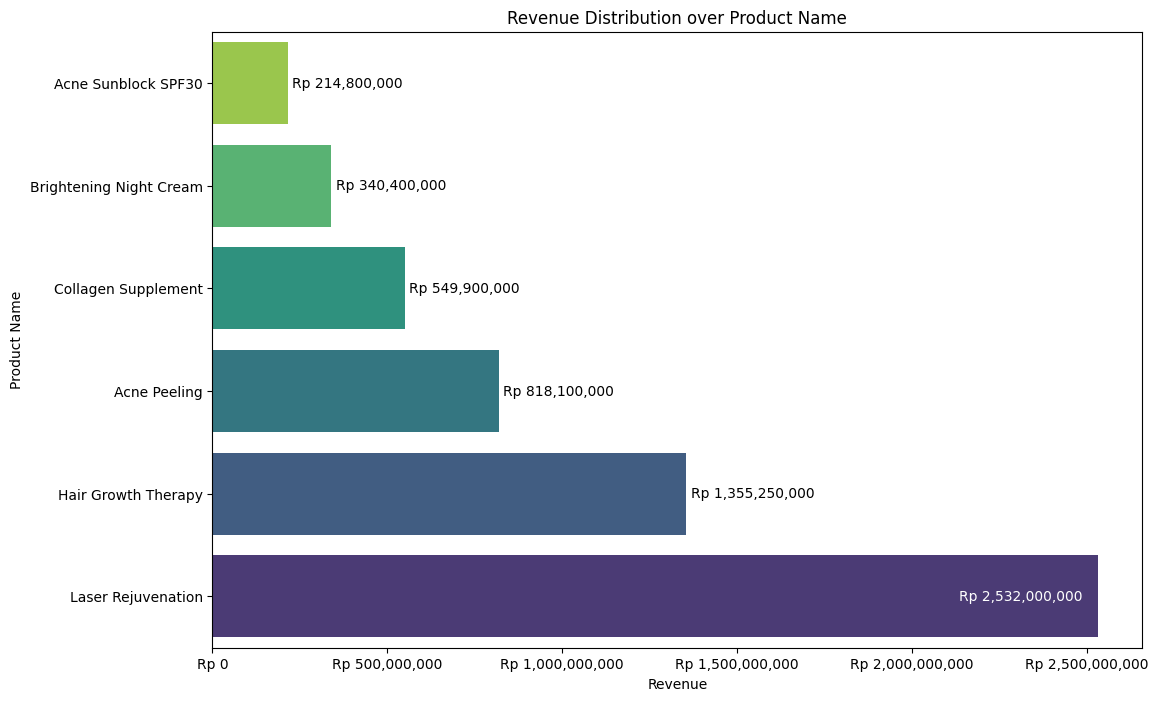

In [11]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=dataset.groupby("ProductName")["TotalSales"].sum() \
        .sort_values(ascending=True).sort_values().reset_index(),
    x="TotalSales",
    y="ProductName",
    hue="ProductName",
    palette="viridis_r",
    orient="h"
)
ax.xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"Rp {x:,.0f}")
)
for i, container in enumerate(ax.containers):
    if i != 5:
        ax.bar_label(
                container,
                fmt=lambda x: f"Rp {x:,.0f}",
                padding=3
        )
    else:
        ax.bar_label(
                container,
                fmt=lambda x: f"Rp {x:,.0f}",
                padding=-100,
                color="white"
        )
ax.set_title("Revenue Distribution over Product Name")
ax.set_ylabel("Product Name")
ax.set_xlabel("Revenue")

Text(0.5, 0, 'Sales')

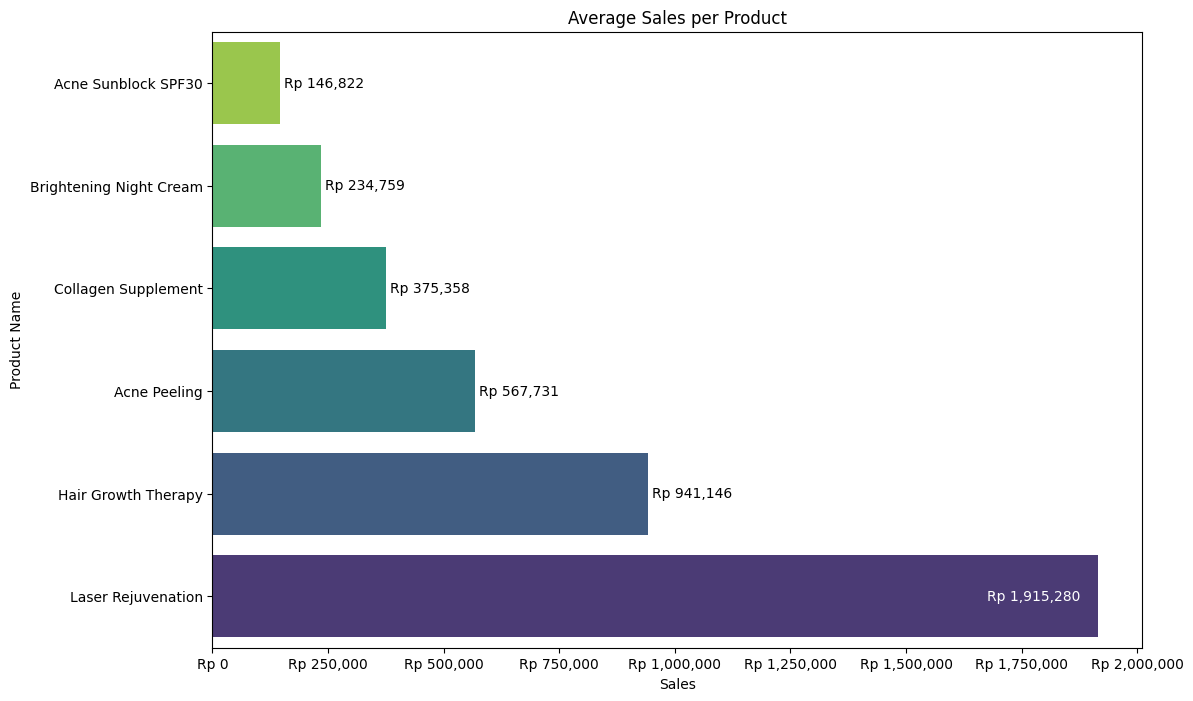

In [12]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=dataset.groupby("ProductName")["TotalSales"].mean() \
        .sort_values(ascending=True).sort_values().reset_index(),
    x="TotalSales",
    y="ProductName",
    hue="ProductName",
    palette="viridis_r",
    errorbar=None,
    orient="h"
)
ax.xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"Rp {x:,.0f}")
)
for i, container in enumerate(ax.containers):
    if i != 5:
        ax.bar_label(
                container,
                fmt=lambda x: f"Rp {x:,.0f}",
                padding=3
        )
    else:
        ax.bar_label(
                container,
                fmt=lambda x: f"Rp {x:,.0f}",
                padding=-80,
                color="white"
        )
ax.set_title("Average Sales per Product")
ax.set_ylabel("Product Name")
ax.set_xlabel("Sales")

Text(0.5, 0, 'Price')

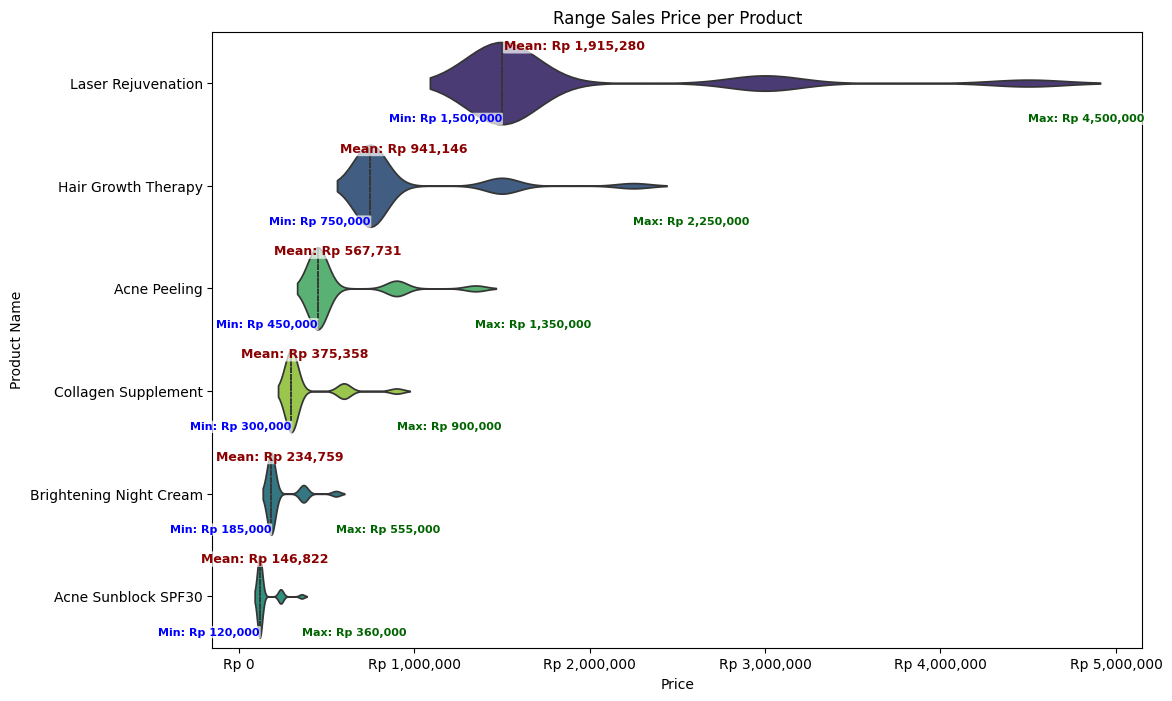

In [13]:
stats = dataset.groupby("ProductName")["TotalSales"].agg(["min", "mean", "max"]).reset_index()
order = stats.sort_values(by="mean", ascending=False)["ProductName"].tolist()
stats = stats.set_index("ProductName").loc[order].reset_index()

plt.figure(figsize=(12, 8))
ax = sns.violinplot(
    data=dataset, 
    x="TotalSales", 
    y="ProductName",
    order=order,
    hue="ProductName",
    palette="viridis",
    inner="quart"
)
for i, product in enumerate(order):
    row = stats[stats["ProductName"] == product].iloc[0]
    mi, me, ma = row["min"], row["mean"], row["max"]

    ax.text(me, i - 0.3, f"Mean: Rp {me:,.0f}", ha="center", va="bottom", 
            fontsize=9, fontweight="bold", color="darkred",
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", boxstyle="round, pad=0.1"))
    
    ax.text(mi, i + 0.3, f"Min: Rp {mi:,.0f}", ha="right", va="top", 
            fontsize=8, fontweight="bold", color="blue",
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", boxstyle="round, pad=0.1"))
    
    ax.text(ma, i + 0.3, f"Max: Rp {ma:,.0f}", ha="left", va="top", 
            fontsize=8, fontweight="bold", color="darkgreen",
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", boxstyle="round, pad=0.1"))

ax.xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"Rp {x:,.0f}")
)
ax.set_title("Range Sales Price per Product")
ax.set_ylabel("Product Name")
ax.set_xlabel("Price")

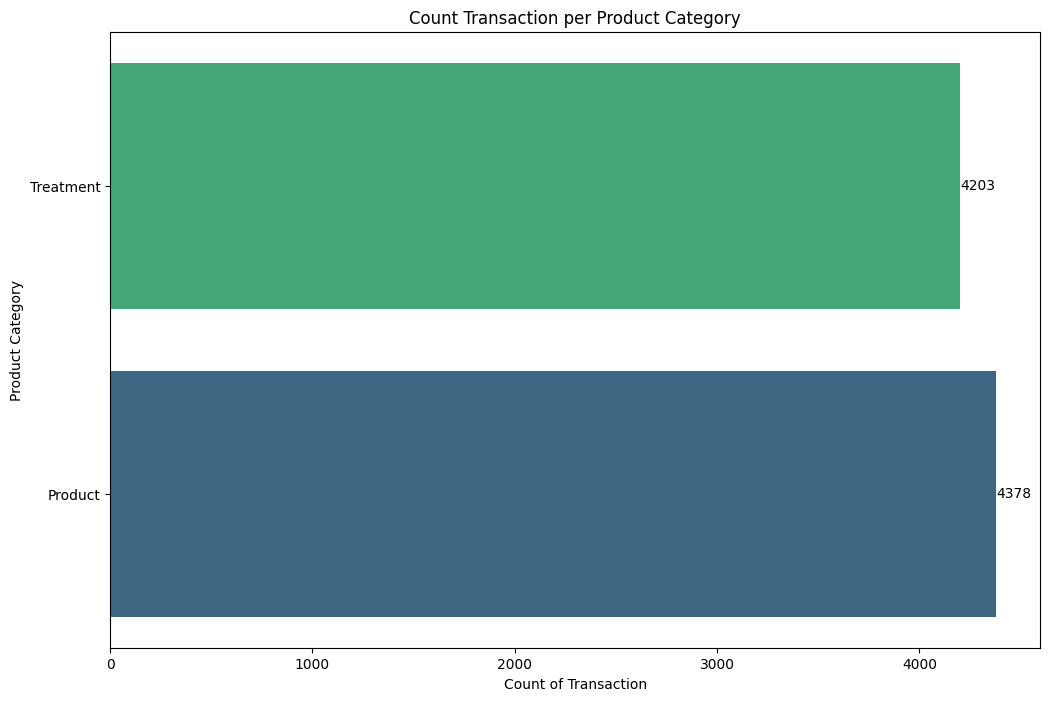

In [14]:
data = dataset.copy()
data["Category"] = data["ProductCode"].apply(lambda x: "Treatment" if x.startswith("TRT") else "Product")

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=data.groupby("Category").size() \
        .sort_values(ascending=True).sort_values().reset_index() \
        .rename(columns={0: "CountTransactions"}),
    x="CountTransactions",
    y="Category",
    hue="Category",
    palette="viridis_r",
    errorbar=None,
    orient="h"
)
ax.set_title("Count Transaction per Product Category")
ax.set_ylabel("Product Category")
ax.set_xlabel("Count of Transaction")
for container in ax.containers:
    ax.bar_label(container)

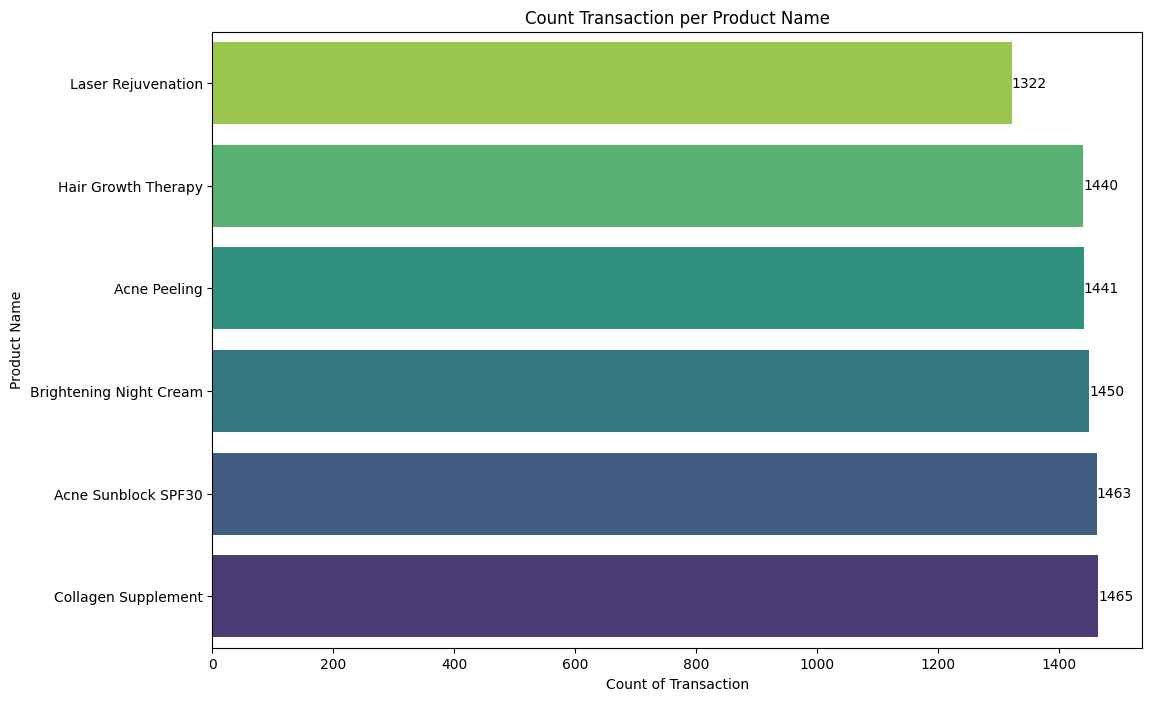

In [15]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=dataset.groupby("ProductName").size().sort_values(ascending=True) \
        .sort_values().reset_index().rename(columns={0:"CountTransactions"}),
    x="CountTransactions",
    y="ProductName",
    hue="ProductName",
    palette="viridis_r",
    errorbar=None,
    orient="h"
)
ax.set_title("Count Transaction per Product Name")
ax.set_ylabel("Product Name")
ax.set_xlabel("Count of Transaction")
for container in ax.containers:
    ax.bar_label(container)

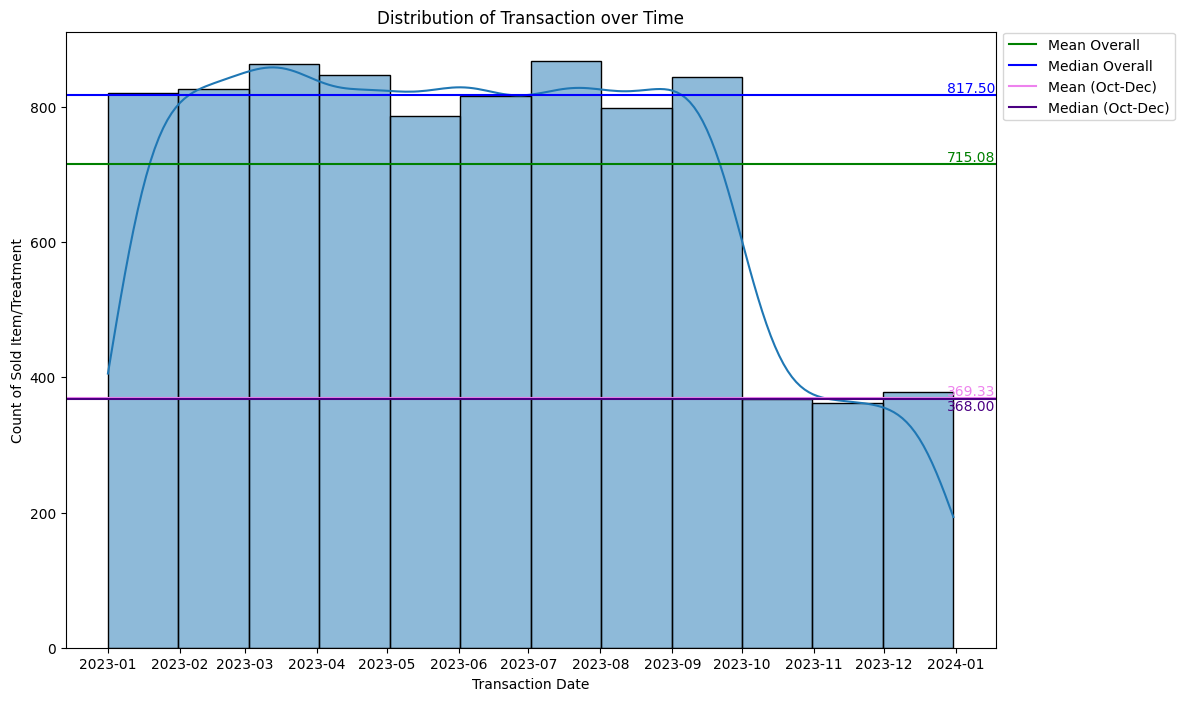

In [16]:
mean_overall = dataset.set_index("TransactionDate").resample("MS").size().mean()
median_overall = dataset.set_index("TransactionDate").resample("MS").size().median()
mean_oct_dec = dataset[dataset.TransactionDate >= "2023-10-01"].set_index("TransactionDate").resample("MS").size().mean()
median_oct_dec = dataset[dataset.TransactionDate >= "2023-10-01"].set_index("TransactionDate").resample("MS").size().median()

plt.figure(figsize=(12, 8))
ax = sns.histplot(data=dataset, x="TransactionDate", bins=12, kde=True)
ax.set_title("Distribution of Transaction over Time")
ax.set_ylabel("Count of Sold Item/Treatment")
ax.set_xlabel("Transaction Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.axhline(mean_overall, color="green", label="Mean Overall")
ax.axhline(median_overall, color="blue", label="Median Overall")
ax.axhline(mean_oct_dec, color="violet", label="Mean (Oct-Dec)")
ax.axhline(median_oct_dec, color="indigo", label="Median (Oct-Dec)")
ax.legend(bbox_to_anchor=(1.2, 1.01), loc="upper right")

for i, line in enumerate(ax.get_lines()):
    label = line.get_label()
    
    if "Mean" in label or "Median" in label:
        y_value = line.get_ydata()[0] 
        
        if i != 4:
            ax.text(
                x=ax.get_xlim()[1], 
                y=y_value, 
                s=f"{y_value:.2f}", 
                color=line.get_color(),
                va="bottom",
                ha="right"
            )
        else:
            ax.text(
                x=ax.get_xlim()[1], 
                y=y_value, 
                s=f"{y_value:.2f}", 
                color=line.get_color(),
                va="top",
                ha="right"
            )

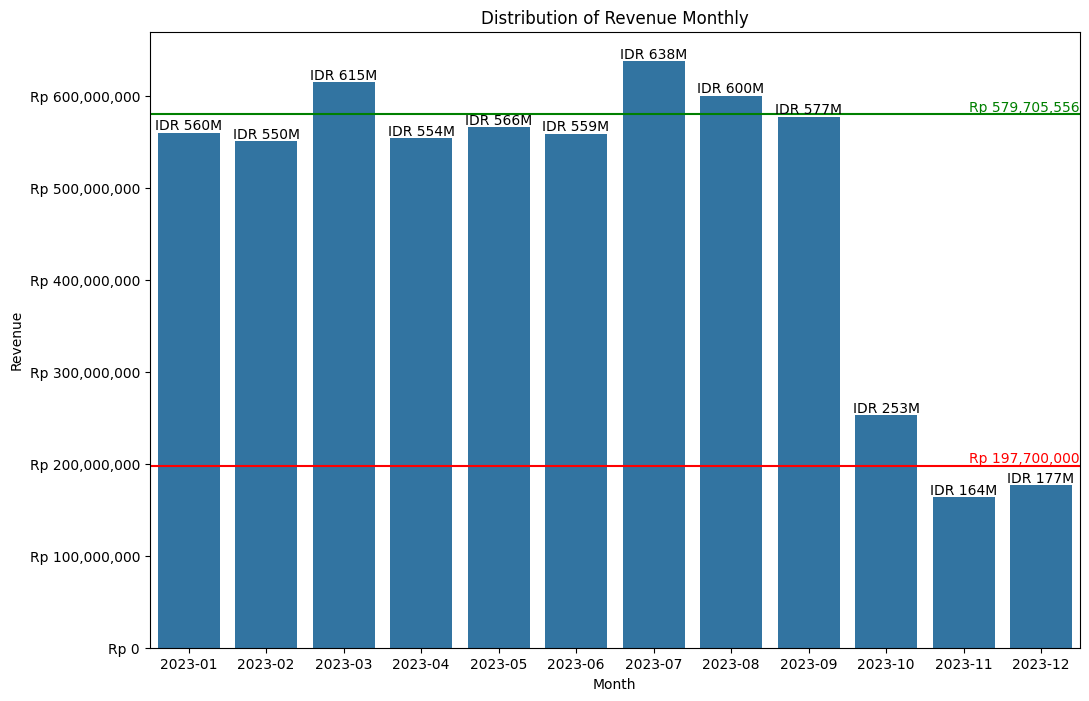

In [17]:
monthly_rev = dataset.groupby("Month")["TotalSales"].sum().reset_index()
mean_q1q3 = monthly_rev[~monthly_rev.Month.isin(["2023-10", "2023-11", "2023-12"])]["TotalSales"].mean()
mean_q4 = monthly_rev[monthly_rev.Month.isin(["2023-10", "2023-11", "2023-12"])]["TotalSales"].mean()

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=monthly_rev, x="Month", y="TotalSales")
ax.set_title("Distribution of Revenue Monthly")
ax.set_ylabel("Revenue")
ax.set_xlabel("Month")
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"Rp {x:,.0f}")
)
ax.axhline(mean_q1q3, color="green", label="Mean Q1-Q3")
ax.axhline(mean_q4, color="red", label="Mean Q4")
for i, line in enumerate(ax.get_lines()):
    label = line.get_label()
    y_value = line.get_ydata()[0] 
    ax.text(
        x=ax.get_xlim()[1], 
        y=y_value, 
        s=f"Rp {y_value:,.0f}", 
        color=line.get_color(),
        va="bottom",
        ha="right"
    )
for container in ax.containers:
    ax.bar_label(
        container,
        fmt=lambda x: f"IDR {x*1e-6:.0f}M"
    )

/tmp/ipykernel_19259/243856590.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=monthly_rev, x="Month", y="MoM_Growth", palette=colors)


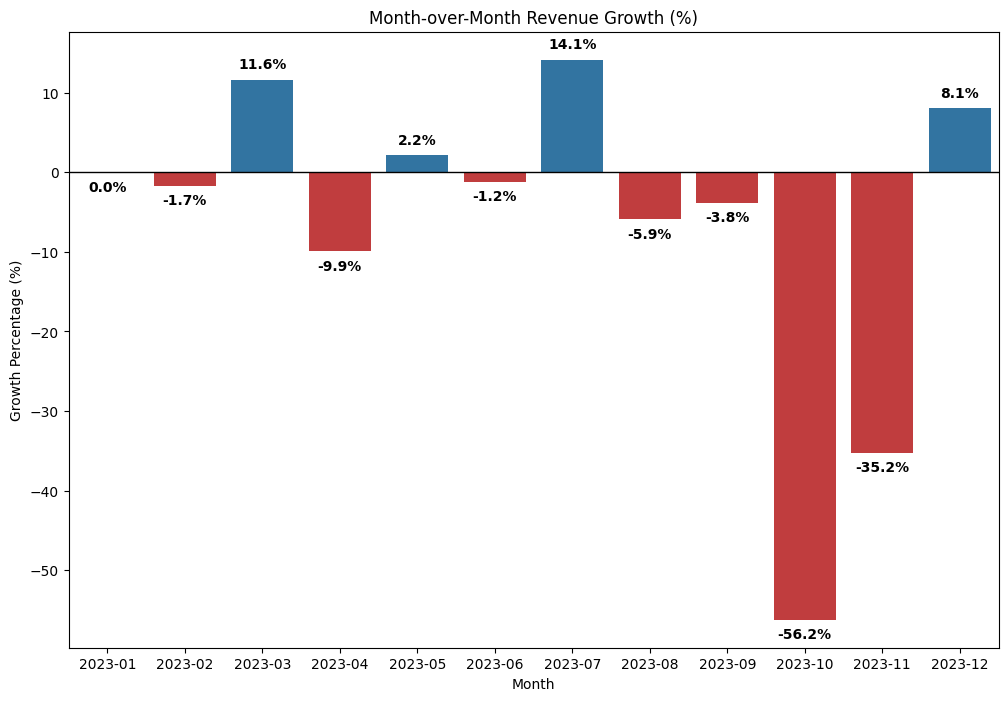

In [18]:
monthly_rev = dataset.groupby("Month")["TotalSales"].sum().reset_index()
monthly_rev["MoM_Growth"] = monthly_rev["TotalSales"].pct_change() * 100
monthly_rev["MoM_Growth"] = monthly_rev["MoM_Growth"].fillna(0)

plt.figure(figsize=(12, 8))
colors = ["#d62728" if x < 0 else "#1f77b4" for x in monthly_rev["MoM_Growth"]]
ax = sns.barplot(data=monthly_rev, x="Month", y="MoM_Growth", palette=colors)
ax.axhline(0, color="black", linewidth=1, linestyle="-")
ax.set_title("Month-over-Month Revenue Growth (%)")
ax.set_ylabel("Growth Percentage (%)")
ax.set_xlabel("Month")
for p in ax.patches:
    height = p.get_height()
    label = f"{height:.1f}%"
    va = "bottom" if height > 0 else "top"
    offset = 1 if height > 0 else -1
    ax.text(
        p.get_x() + p.get_width() / 2, 
        height + offset, 
        label, 
        ha="center", 
        va=va, 
        fontsize=10, 
        fontweight="bold",
        color="black"
    )

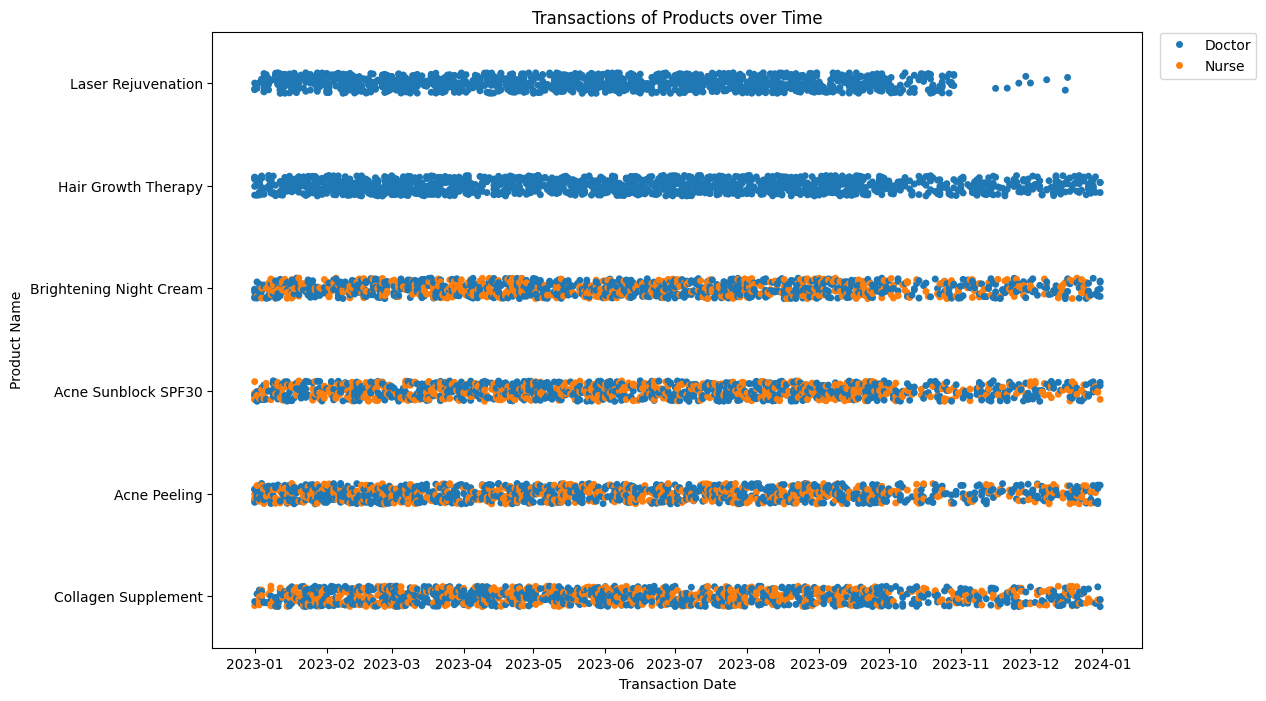

In [19]:
plt.figure(figsize=(12, 8))
ax = sns.stripplot(data=dataset, x="TransactionDate", y="ProductName", hue="MedicalJobdesk")
ax.legend(bbox_to_anchor=(1.13, 1.01), loc="upper right")
ax.set_title("Transactions of Products over Time")
ax.set_ylabel("Product Name")
ax.set_xlabel("Transaction Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())

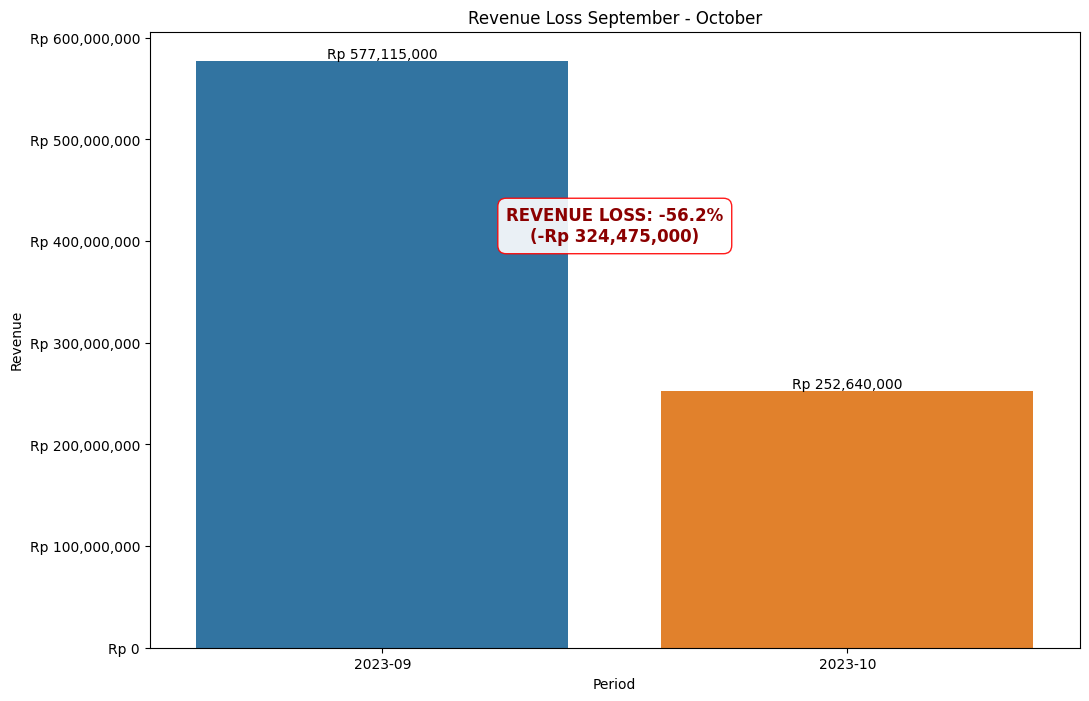

In [20]:
data = dataset.copy()
data = data.groupby("Month")["TotalSales"].sum().reset_index()
data = data[(data.Month >= "2023-09") & (data.Month <= "2023-10")]

loss_val = data.iloc[0].TotalSales -  data.iloc[1].TotalSales
loss_pct = (loss_val / data.iloc[0].TotalSales) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=data, x="Month", y="TotalSales", hue="Month")
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"Rp {x:,.0f}")
)
ax.text(0.5, (data.iloc[0].TotalSales + data.iloc[1].TotalSales) / 2, 
         f"REVENUE LOSS: -{loss_pct:.1f}%\n(-Rp {loss_val:,.0f})", 
         ha="center", va="center", fontsize=12, fontweight="bold", color="darkred",
         bbox=dict(facecolor="white", alpha=0.9, edgecolor="red", boxstyle="round, pad=0.5"))
ax.set_title("Revenue Loss September - October")
ax.set_ylabel("Revenue")
ax.set_xlabel("Period")
for container in ax.containers:
    ax.bar_label(
        container,
        fmt=lambda x: f"Rp {x:,.0f}"
    )

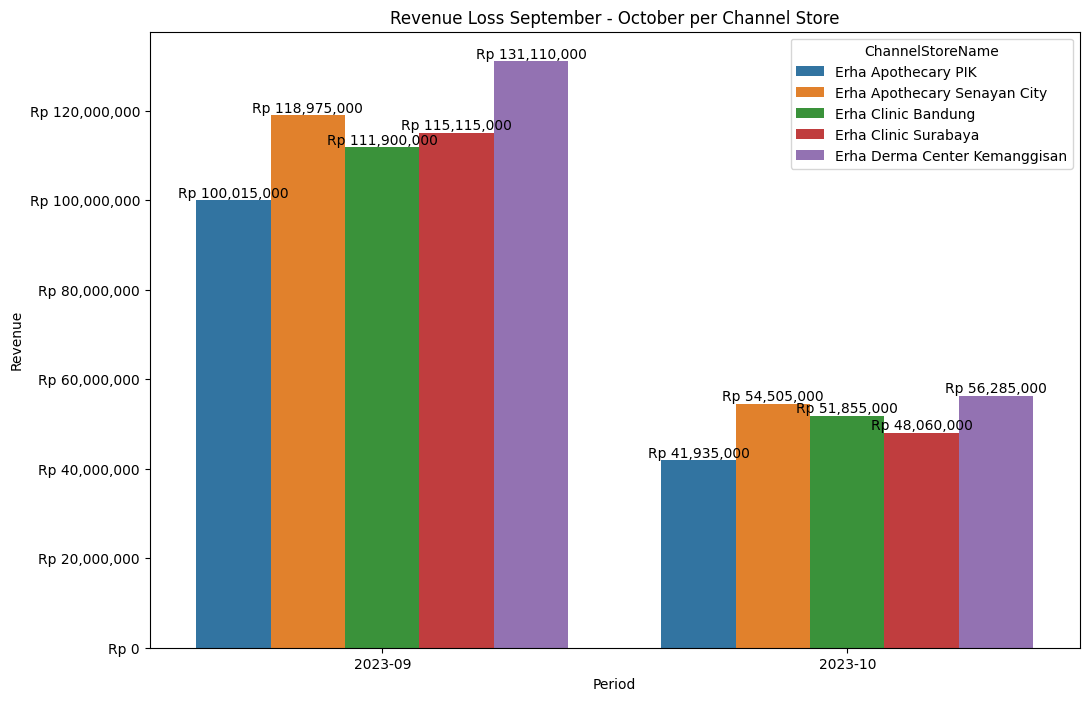

In [21]:
data = dataset.copy()
data = data.groupby(["Month", "ChannelStoreName"])["TotalSales"].sum().reset_index()
data = data[(data.Month >= "2023-09") & (data.Month <= "2023-10")]
data

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=data, x="Month", y="TotalSales", hue="ChannelStoreName")
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"Rp {x:,.0f}")
)
ax.set_title("Revenue Loss September - October per Channel Store")
ax.set_ylabel("Revenue")
ax.set_xlabel("Period")
for container in ax.containers:
    ax.bar_label(
        container,
        fmt=lambda x: f"Rp {x:,.0f}"
    )

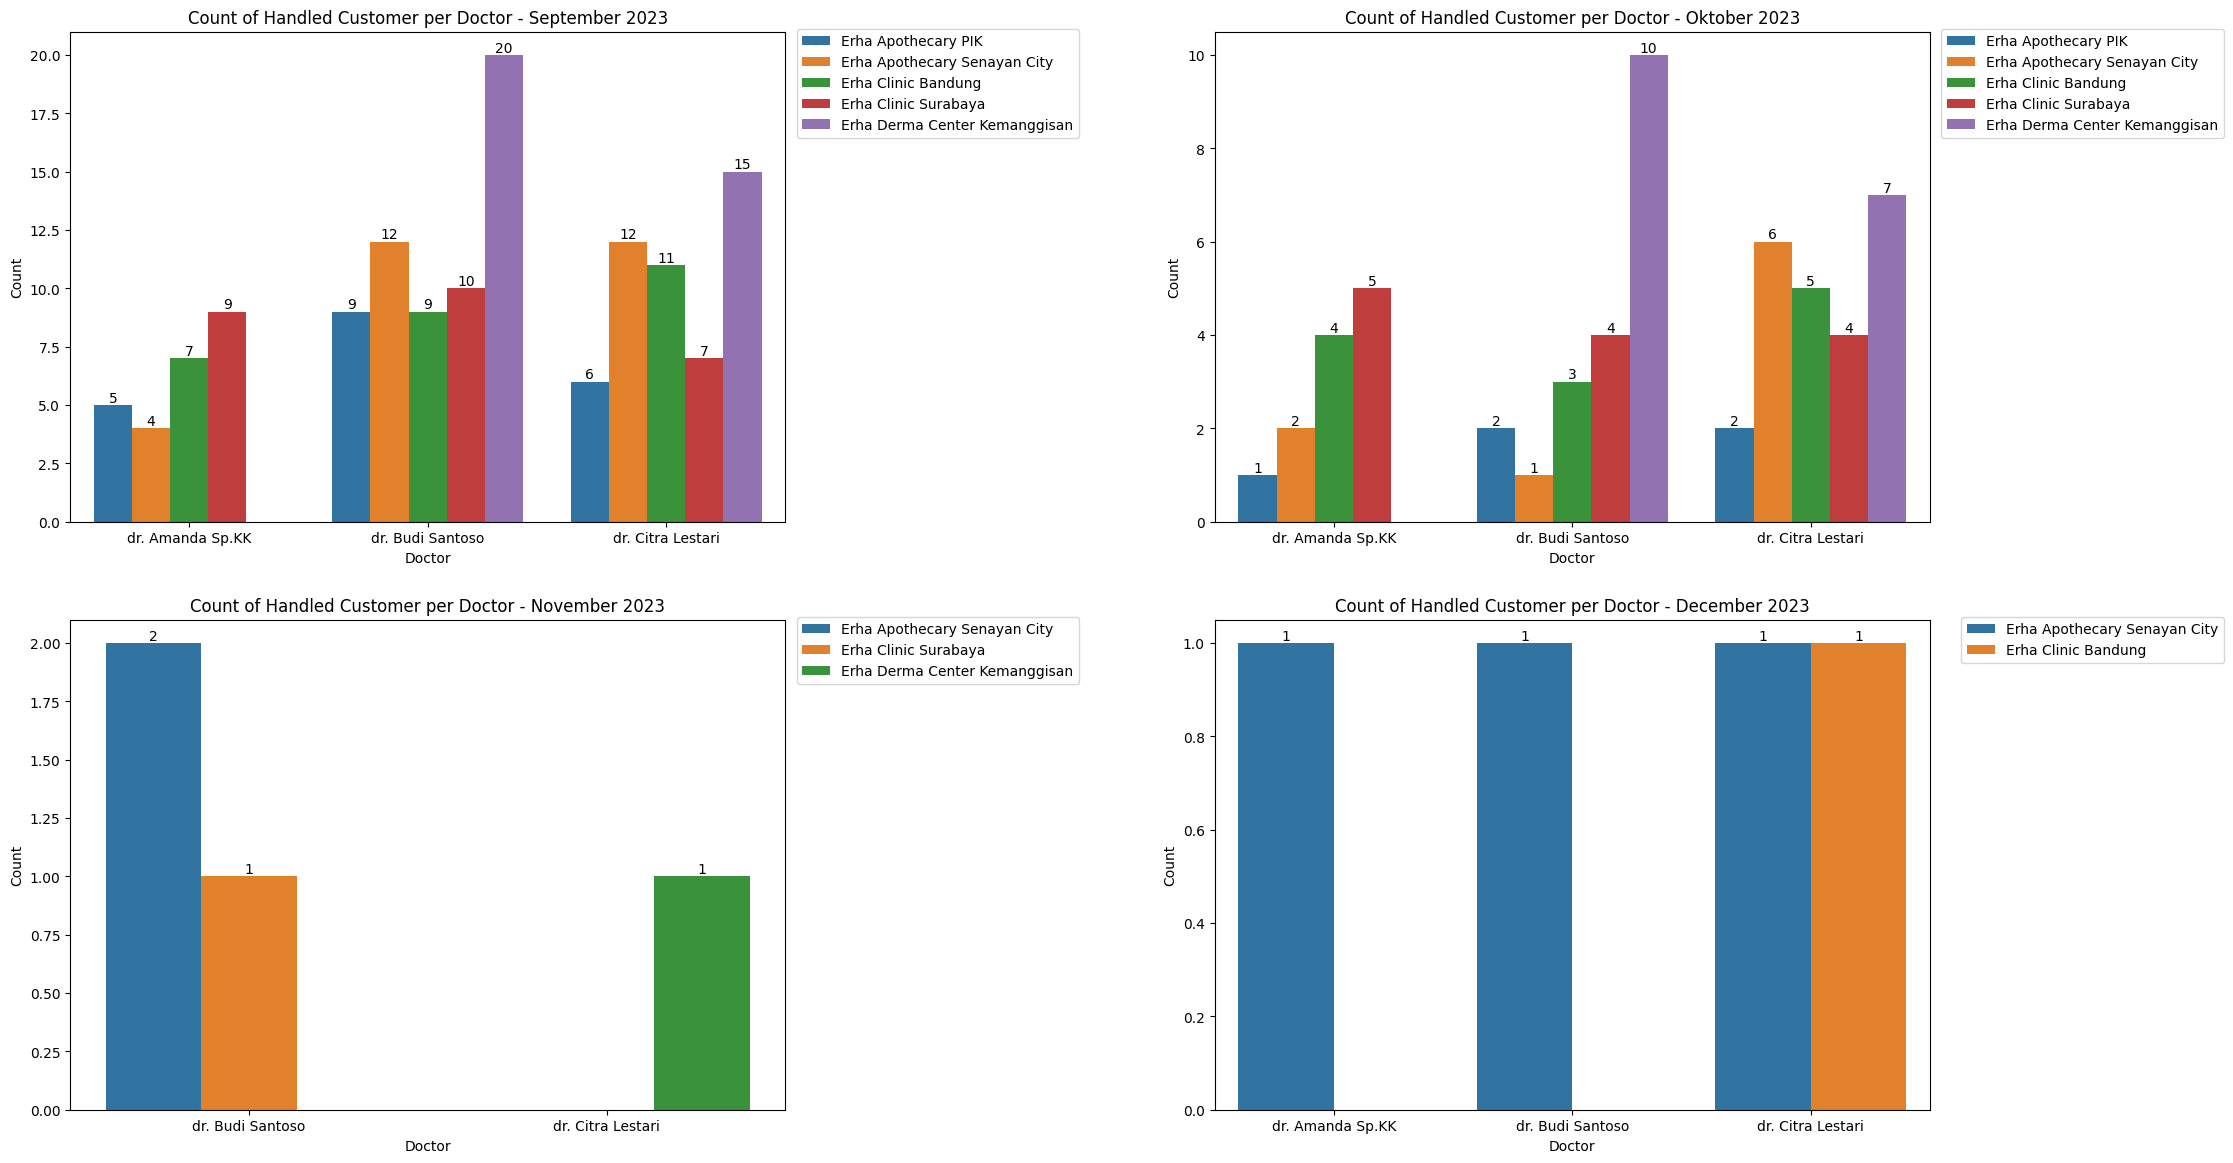

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(24, 14))

condition_1 = dataset.Month == "2023-09"
condition_2 = dataset.ProductName == "Laser Rejuvenation"
data = dataset[condition_1 & condition_2]
data = data.groupby(["DoctorName", "ChannelStoreName"]).size().reset_index().rename(columns={0: "CountHandled"})
ax = sns.barplot(data=data, x="DoctorName", y="CountHandled", hue="ChannelStoreName", ax=axes[0,0])
for container in ax.containers:
    ax.bar_label(
        container
    )
ax.legend(bbox_to_anchor=(1.42, 1.02), loc="upper right")
ax.set_title("Count of Handled Customer per Doctor - September 2023")
ax.set_ylabel("Count")
ax.set_xlabel("Doctor")

condition_1 = dataset.Month == "2023-10"
condition_2 = dataset.ProductName == "Laser Rejuvenation"
data = dataset[condition_1 & condition_2]
data = data.groupby(["DoctorName", "ChannelStoreName"]).size().reset_index().rename(columns={0: "CountHandled"})
ax = sns.barplot(data=data, x="DoctorName", y="CountHandled", hue="ChannelStoreName", ax=axes[0,1])
for container in ax.containers:
    ax.bar_label(
        container
    )
ax.legend(bbox_to_anchor=(1.42, 1.02), loc="upper right")
ax.set_title("Count of Handled Customer per Doctor - Oktober 2023")
ax.set_ylabel("Count")
ax.set_xlabel("Doctor")

condition_1 = dataset.Month == "2023-11"
condition_2 = dataset.ProductName == "Laser Rejuvenation"
data = dataset[condition_1 & condition_2]
data = data.groupby(["DoctorName", "ChannelStoreName"]).size().reset_index().rename(columns={0: "CountHandled"})
ax = sns.barplot(data=data, x="DoctorName", y="CountHandled", hue="ChannelStoreName", ax=axes[1,0])
for container in ax.containers:
    ax.bar_label(
        container
    )
ax.legend(bbox_to_anchor=(1.42, 1.02), loc="upper right")
ax.set_title("Count of Handled Customer per Doctor - November 2023")
ax.set_ylabel("Count")
ax.set_xlabel("Doctor")

condition_1 = dataset.Month == "2023-12"
condition_2 = dataset.ProductName == "Laser Rejuvenation"
data = dataset[condition_1 & condition_2]
data = data.groupby(["DoctorName", "ChannelStoreName"]).size().reset_index().rename(columns={0: "CountHandled"})
ax = sns.barplot(data=data, x="DoctorName", y="CountHandled", hue="ChannelStoreName", ax=axes[1,1])
for container in ax.containers:
    ax.bar_label(
        container
    )
ax.legend(bbox_to_anchor=(1.42, 1.02), loc="upper right")
ax.set_title("Count of Handled Customer per Doctor - December 2023")
ax.set_ylabel("Count")
ax.set_xlabel("Doctor")

plt.subplots_adjust(wspace=0.6, hspace=0.2)